In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
face_df = pd.read_csv('SentimentImage.csv')
Y = face_df['label']
face_df.head()

,label,feature
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [3]:
test0 = face_df['feature'][0].split()
test0 =np.asarray(test0)
test0.astype(int).reshape([48, 48])

array([[ 70,  80,  82, ...,  52,  43,  41],
       [ 65,  61,  58, ...,  56,  52,  44],
       [ 50,  43,  54, ...,  49,  56,  47],
       ...,
       [ 91,  65,  42, ...,  72,  56,  43],
       [ 77,  82,  79, ..., 105,  70,  46],
       [ 77,  72,  84, ..., 106, 109,  82]])

In [4]:
len(face_df['feature'])

28700

### 前處理

In [5]:
X = np.array(face_df['feature'].str.split(" ", expand=True)).reshape(len(face_df), 48, 48, 1).astype('float32')
X = X/255

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [6]:
X_train.shape

(22960, 48, 48, 1)

### CNN Model

In [7]:
model_CNN = Sequential()
model_CNN.add(Conv2D(48, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(48, 48, 1)))
model_CNN.add(Conv2D(96, (5, 5), activation='relu'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Dropout(0.25))
model_CNN.add(Conv2D(48, (3, 3), activation='relu'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))

model_CNN.add(Flatten())
model_CNN.add(Dense(128, activation='relu'))
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(7, activation='softmax'))

model_CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 48)        480       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 42, 42, 96)        115296    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 96)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 21, 21, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 19, 19, 48)        41520     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 48)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3888)              0         
__________

In [8]:
model_CNN.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

train_history_CNN = model_CNN.fit(x=X_train, y=y_train,
                          batch_size=30,
                          epochs=30,
                          verbose=1,
                          validation_split=0.25)

Train on 17220 samples, validate on 5740 samples
Epoch 1/30
17220/17220 [==============================] - 9s 516us/step - loss: 1.8100 - acc: 0.2481 - val_loss: 1.7067 - val_acc: 0.3005
Epoch 2/30
17220/17220 [==============================] - 7s 412us/step - loss: 1.6847 - acc: 0.3246 - val_loss: 1.6053 - val_acc: 0.3754
Epoch 3/30
17220/17220 [==============================] - 7s 414us/step - loss: 1.5583 - acc: 0.3905 - val_loss: 1.4454 - val_acc: 0.4436
Epoch 4/30
17220/17220 [==============================] - 7s 413us/step - loss: 1.4583 - acc: 0.4328 - val_loss: 1.3679 - val_acc: 0.4784
Epoch 5/30
17220/17220 [==============================] - 7s 414us/step - loss: 1.3939 - acc: 0.4624 - val_loss: 1.3249 - val_acc: 0.4838
Epoch 6/30
17220/17220 [==============================] - 7s 414us/step - loss: 1.3329 - acc: 0.4902 - val_loss: 1.3073 - val_acc: 0.5012
Epoch 7/30
17220/17220 [==============================] - 7s 413us/step - loss: 1.2784 - acc: 0.5053 - val_loss: 1.2767 - v

In [9]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

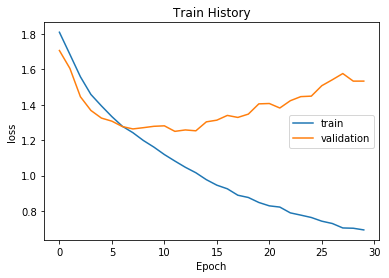

In [10]:
show_train_history(train_history_CNN, 'loss', 'val_loss')

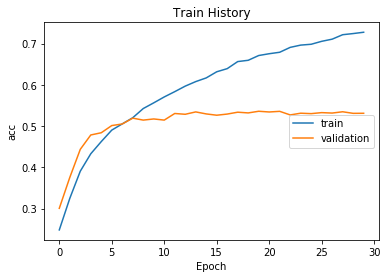

In [11]:
show_train_history(train_history_CNN, 'acc', 'val_acc')

In [12]:
CNN_prediction = model_CNN.predict_classes(Ｘ_test)
pd.crosstab(y_test, CNN_prediction, rownames=['Label'], colnames=['Predict'])

Predict,0,1,2,3,4,5,6
Label,,,,,,,
0,342,1,83,58,156,16,114
1,20,20,11,3,22,2,6
2,108,2,292,73,194,73,114
3,61,0,47,1122,108,21,122
4,110,1,114,82,451,10,196
5,27,0,84,43,28,394,43
6,81,0,60,93,198,7,527


In [17]:
X_train.shape[0]

22960

### MLP

In [18]:
X_train_2D = X_train.reshape(X_train.shape[0], 48 * 48).astype('float32')
X_test_2D = X_test.reshape(X_test.shape[0], 48 * 48).astype('float32')

In [14]:
model_MLP = Sequential()
model_MLP.add(Dense(256, input_dim=2304, activation='relu'))
model_MLP.add(Dense(128, activation='relu'))
model_MLP.add(Dense(64, activation='relu'))
model_MLP.add(Dense(7, activation='softmax'))
model_MLP.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               590080    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 455       
Total params: 631,687
Trainable params: 631,687
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_MLP.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history_MLP = model_MLP.fit(x=X_train_2D, y=y_train, validation_split=0.2, epochs=100, batch_size=100, verbose=1)

Train on 18368 samples, validate on 4592 samples
Epoch 1/100
18368/18368 [==============================] - 1s 46us/step - loss: 1.2895 - acc: 0.5076 - val_loss: 1.6650 - val_acc: 0.3872
Epoch 2/100
18368/18368 [==============================] - 1s 30us/step - loss: 1.2806 - acc: 0.5111 - val_loss: 1.6597 - val_acc: 0.3822
Epoch 3/100
18368/18368 [==============================] - 1s 31us/step - loss: 1.2711 - acc: 0.5175 - val_loss: 1.6758 - val_acc: 0.3743
Epoch 4/100
18368/18368 [==============================] - 1s 30us/step - loss: 1.2718 - acc: 0.5167 - val_loss: 1.6235 - val_acc: 0.3911
Epoch 5/100
18368/18368 [==============================] - 1s 30us/step - loss: 1.2551 - acc: 0.5273 - val_loss: 1.6893 - val_acc: 0.3804
Epoch 6/100
18368/18368 [==============================] - 1s 30us/step - loss: 1.2516 - acc: 0.5250 - val_loss: 1.6525 - val_acc: 0.3946
Epoch 7/100
18368/18368 [==============================] - 1s 30us/step - loss: 1.2330 - acc: 0.5336 - val_loss: 1.6631 - v

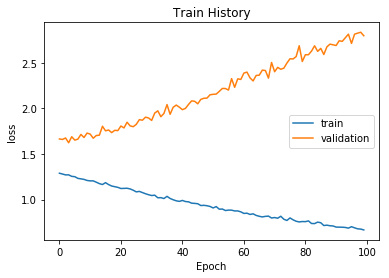

In [23]:
show_train_history(train_history_MLP, 'loss', 'val_loss')

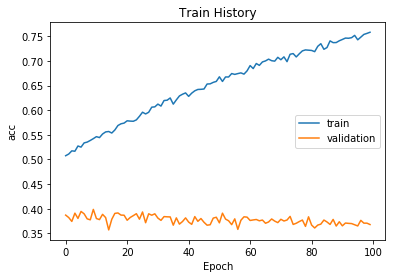

In [24]:
show_train_history(train_history_MLP, 'acc', 'val_acc')

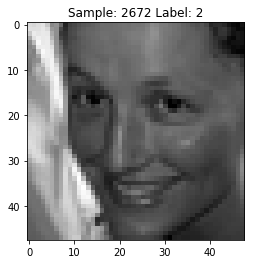

In [30]:
def display_img(num):
    # print(y_train[num])
    label = y_train[num]
    image = X_train[num].reshape([48, 48])
    plt.title('Sample: %d Label: %d' % (num, label))
    plt.imshow(image, cmap='gray')
    
display_img(2672)

In [29]:
y_train

2672     2
5007     4
10950    0
27783    3
18624    0
24333    4
12268    4
10687    6
13565    3
5777     3
25764    6
22604    6
6113     0
21057    0
19233    0
6330     0
25743    2
20345    3
13465    2
7826     1
13290    4
24847    0
3232     2
14078    3
15467    3
17860    4
5738     0
4694     4
1381     2
24650    4
        ..
18491    0
19315    6
1949     6
20851    3
26760    4
26106    2
12911    3
49       2
20957    3
25484    0
23557    2
19566    6
22208    0
13020    0
6460     2
28405    0
21416    3
2623     6
22148    2
22056    0
17357    4
20463    6
12363    4
22525    3
16983    3
5695     4
8006     2
17745    0
17931    2
13151    2
Name: label, Length: 22960, dtype: int64